# Facebook Prophet

### Import necessary libraries and read the data

In [1]:
import pandas as pd
import numpy as np
from fbprophet import Prophet
%matplotlib inline

In [2]:
df = pd.read_csv('../Data/RestaurantVisitors.csv')

In [3]:
#data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 9 columns):
date            517 non-null object
weekday         517 non-null object
holiday         517 non-null int64
holiday_name    517 non-null object
rest1           478 non-null float64
rest2           478 non-null float64
rest3           478 non-null float64
rest4           478 non-null float64
total           478 non-null float64
dtypes: float64(5), int64(1), object(3)
memory usage: 36.4+ KB


In [4]:
#dropping all columns except date and total
df = df.drop(['weekday','holiday', 'holiday_name', 'rest1', 'rest2', 'rest3', 'rest4'], axis =1)

df = df.dropna()

In [5]:
df['total'] = df['total'].astype(int)

### Constructing dataframe for Facebook Prophet (ds and y columns)

In [7]:
df.columns = ['ds','y']

In [8]:
#changing ds to datetime
df['ds'] = pd.to_datetime(df['ds'])

In [9]:
df.head()

,ds,y
0,2016-01-01,296
1,2016-01-02,191
2,2016-01-03,202
3,2016-01-04,105
4,2016-01-05,98


In [10]:
pd.plotting.register_matplotlib_converters()

### Plotting source data

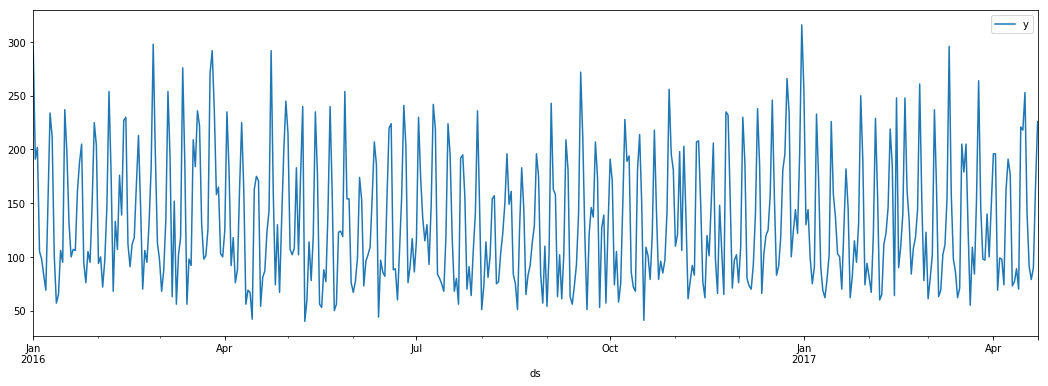

In [11]:
df.plot(x='ds',y='y',figsize=(18,6))

### Fitting the prophet Model

In [12]:
m = Prophet()
m.fit(df)
future = m.make_future_dataframe(periods=12,freq="D")
forecast = m.predict(future)


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\Anugya\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



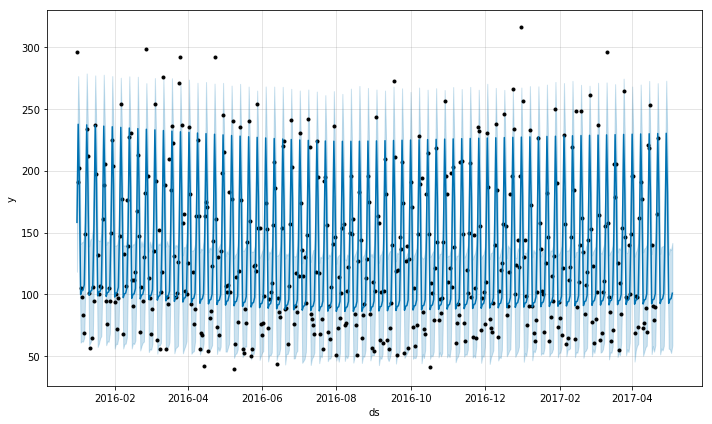

In [13]:
fig = m.plot(forecast)

### Fitting model with seasonality and holiday effects

In [14]:
model2=Prophet(interval_width=0.95, yearly_seasonality=True, weekly_seasonality=True, 
               changepoint_prior_scale=4)
model2.add_country_holidays(country_name='US')

### Storing future predictions

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\Users\Anugya\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



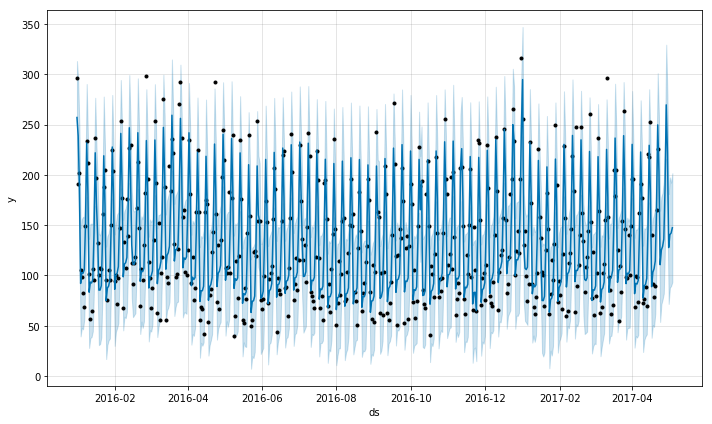

In [15]:
model2.fit(df)
future2 = model2.make_future_dataframe(periods=12,freq="D")
forecast2 = model2.predict(future2)
fig = model2.plot(forecast2)

In [19]:
forecast2[['ds','yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
485,2017-04-30,222.264272,164.896717,278.022122
486,2017-05-01,127.762255,71.679281,181.012238
487,2017-05-02,140.634423,87.792557,197.522420
488,2017-05-03,142.153483,89.548466,192.275277
489,2017-05-04,147.420516,93.377545,201.703825


### Actual vs Predictions Plot

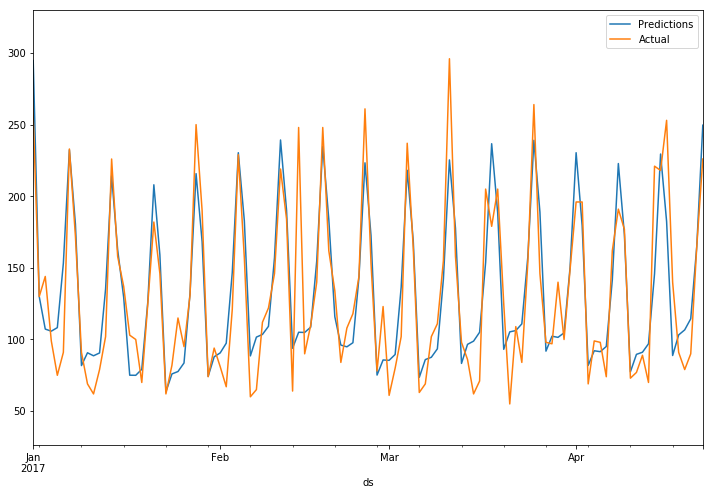

In [83]:
ax = forecast2.plot(x='ds',y='yhat',label='Predictions',legend=True,figsize=(12,8))

df.plot(x='ds',y='y',label='Actual',legend=True,ax=ax,xlim=('2017-01-01','2017-04-22'))

### Calculation of MAPE

In [24]:
def mean_absolute_percentage_error(y_true, y_pred): 
    #y_true, y_pred = check_arrays(y_true, y_pred)

    ## Note: does not handle mix 1d representation
    #if _is_1d(y_true): 
    #    y_true, y_pred = _check_1d_array(y_true, y_pred)

    return np.mean(np.abs((y_pred - y_true) /np.abs(y_true))) * 100

In [41]:
print('Mean absolute percentage error: ',mean_absolute_percentage_error(df.y,forecast2.yhat))

Mean absolute percentage error:  18.444988298116222


### Showing trend Change Points

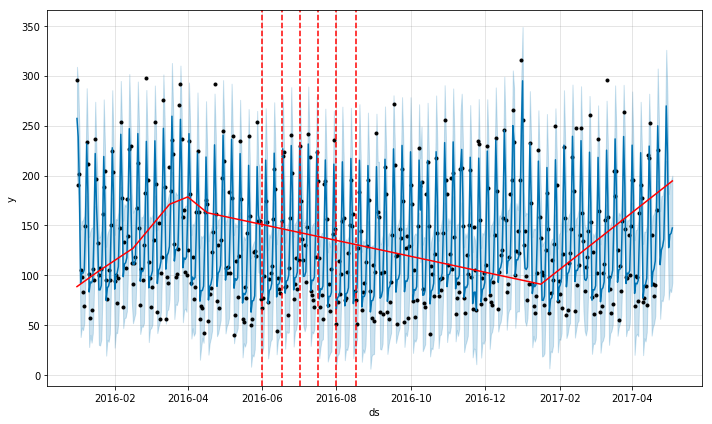

In [43]:
from fbprophet.plot import add_changepoints_to_plot
fig = m.plot(forecast2)
a = add_changepoints_to_plot(fig.gca(), m, forecast2)

### Plotting the components

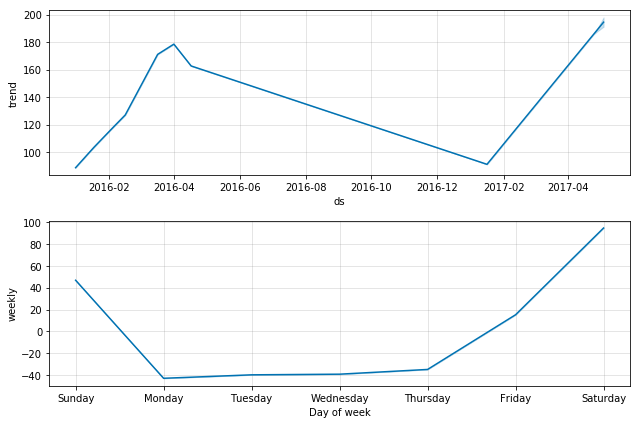

In [46]:
fig = m.plot_components(forecast2)